[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(-0.5, 251.5, 311.5, -0.5)

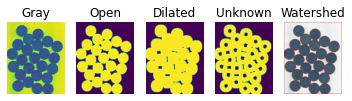

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"Input Images/water_coins.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.imshow('gray',gray)
cv2.waitKey(0)

plt.subplot(151)
plt.imshow(gray)
plt.title("Gray")
plt.axis('off')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.subplot(152)
cv2.imshow('opening',opening)
cv2.waitKey(0)

plt.imshow(opening)
plt.title("Open")
plt.axis('off')

sure_bg = cv2.dilate(opening, kernel, iterations = 3)
plt.subplot(153)
plt.imshow(sure_bg)
plt.title("Dilated")
plt.axis('off')

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.subplot(154)
plt.imshow(unknown)
plt.title("Unknown")
plt.axis('off')

ret, markers = cv2.connectedComponents(sure_fg)
print(markers) 
markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
cv2.imshow('watershed',img)
cv2.waitKey(0)

plt.subplot(155)
plt.imshow(img)
plt.title("Watershed")
plt.axis('off')